# Statistical Analyses

In [7]:
#Import Python Libraries
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

1) Importing data

In [8]:
# Setting working directory

#Data = pd.read_excel('D:\Tutorials\Python\Data\STIData.xls',sheet_name='Sheet1', index_col=None, na_values=['NA'])
#Data = pd.read_stata('D:\Tutorials\Python\Data\STIData.dta')
Data = pd.read_csv('D:\Tutorials\Python\Data\STIData.csv', parse_dates=True)

#Data = pd.read_sas('myfile.sas7bdat')
#Data = pd.read_hdf('myfile.h5','df')

 2) Exploring data

In [9]:
Data.head(5)

,IdNumber,CaseStatus,Date,A1Age,A2Occupation,A3Church,A4LevelOfEducation,A5MaritalStatus,Weight,Height,...,Unemployed,Education,AlcoholUse,SexPartner1year,SexPartner3month,LastPartnerSpouse,Belong,ReceiveHelp,SexPartnerLife3,Sex.1
0,32,2,03-Dec-09,23,1 unemployed,5 pentecostal,3 secondary,2 married,61.0,182.0,...,1.0,2,2.0,0,0,1,1,1,0,Female
1,33,1,03-Dec-09,24,4 student,2 apostolic,3 secondary,2 married,53.0,166.0,...,NaN,2,1.0,0,0,1,0,0,0,Female
2,34,2,03-Dec-09,24,1 unemployed,2 apostolic,3 secondary,2 married,91.4,166.0,...,1.0,2,1.0,0,0,1,1,1,0,Female
3,35,1,03-Dec-09,33,3 formal,7 roman catholic,3 secondary,2 married,100.0,166.0,...,2.0,2,2.0,0,0,1,1,1,0,Female
4,10,2,03-Dec-09,63,4 student,8 other,2 primary,2 married,83.0,156.0,...,NaN,1,2.0,0,0,1,1,1,0,Male


In [10]:
print(Data['A1Age'].dtype) # Check particular variable

Data.dtypes # Check all data types


int64


IdNumber                  int64
CaseStatus                int64
Date                     object
A1Age                     int64
A2Occupation             object
A3Church                 object
A4LevelOfEducation       object
A5MaritalStatus          object
Weight                  float64
Height                  float64
C3StiYesno              float64
D1BurialSociety           int64
D1religiousgrp            int64
D1savingsClub           float64
D1tradersAssoc            int64
D2Group1                 object
D2Group2                 object
D3Education             float64
D3FuneralAssistance     float64
D3HealthServices        float64
DurationOfillness       float64
E8WhyhaveSTI             object
N10givereceiveforsex     object
N11Usedcondom            object
N12UseCondom             object
N13TakenAlcohol          object
N14DoYouHave              int64
N15LivingTogether       float64
N16HowOldIs             float64
D3receivecredit         float64
Typeofsti                object
N2SexDeb

In [11]:
# Some descrirptive statistics
Data['A1Age'].describe(), Data['Weight'].describe() 

(count    227.000000
 mean      28.039648
 std        7.184251
 min       16.000000
 25%       23.000000
 50%       26.000000
 75%       32.000000
 max       63.000000
 Name: A1Age, dtype: float64, count    227.000000
 mean      53.751101
 std       11.684739
 min       32.800000
 25%       45.500000
 50%       51.000000
 75%       60.750000
 max      100.000000
 Name: Weight, dtype: float64)

In [12]:
Data['A2Occupation'].describe()

count          227
unique           4
top       3 formal
freq            92
Name: A2Occupation, dtype: object

In [13]:
print(Data['Weight'].sum()) # Sum of weight

print(Data['Weight'].mean()) # Mean of weight

print(Data['Weight'].sem()) # Standard error of mean of weight

print(Data['Weight'].mode()) # Mode of weight

print(Data['Weight'].median()) # Median of weight

print(Data['Weight'].std()) # Standard deviation of weight

print(Data['Weight'].var()) # Varaince of weight

print(Data['Weight'].min()) # Minimum of weight

print(Data['Weight'].max()) # maximum of weight

print(Data['Weight'].skew()) # Skewness of weight

print(Data['Weight'].kurt()) # Kurtosis of weight

print(Data['Weight'].count()) # count/sample size of weight


12201.5
53.75110132158588
0.7755433772600235
0    49.0
dtype: float64
51.0
11.684739163228997
136.53312931269747
32.8
100.0
1.0643460711757475
1.5507757736749355
227


In [14]:
# Calculate the mean of all variables by level of education

Data.groupby('A4LevelOfEducation').mean()

,IdNumber,CaseStatus,A1Age,Weight,Height,C3StiYesno,D1BurialSociety,D1religiousgrp,D1savingsClub,D1tradersAssoc,...,HabitationStatus,Unemployed,Education,AlcoholUse,SexPartner1year,SexPartner3month,LastPartnerSpouse,Belong,ReceiveHelp,SexPartnerLife3
A4LevelOfEducation,,,,,,,,,,,,,,,,,,,,,
1 none,149.000000,1.000000,39.000000,74.000000,167.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
2 primary,117.538462,1.461538,35.653846,53.153846,161.423077,0.100000,1.653846,1.730769,1.807692,2.000000,...,1.307692,1.560000,1.0,1.730769,0.076923,0.038462,0.769231,0.500000,0.538462,0.500000
3 secondary,111.566138,1.534392,27.253968,53.693122,160.808511,0.157895,1.656085,1.407407,1.702128,1.936508,...,1.280423,1.646409,2.0,1.689840,0.238095,0.111111,0.703704,0.740741,0.714286,0.396825
4 tertiary,128.272727,1.363636,22.545455,54.318182,161.363636,0.222222,1.727273,1.454545,2.000000,2.000000,...,1.727273,1.833333,2.0,1.909091,0.363636,0.000000,0.272727,0.545455,0.545455,0.272727


In [15]:
# Calculate the mean of A1Age by level of education

Data.groupby('A4LevelOfEducation')[['A1Age']].mean()

,A1Age
A4LevelOfEducation,
1 none,39.000000
2 primary,35.653846
3 secondary,27.253968
4 tertiary,22.545455


In [16]:
Data['A1Age'].groupby(Data['A4LevelOfEducation']).aggregate([min, max, sum])

,min,max,sum
A4LevelOfEducation,,,
1 none,39,39,39
2 primary,18,63,927
3 secondary,16,50,5151
4 tertiary,19,27,248


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


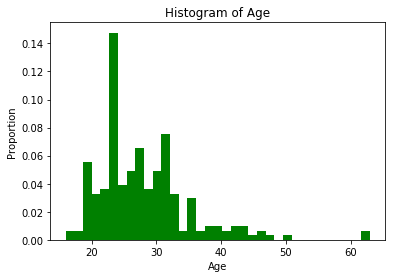

In [34]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(Data['A1Age'], 
         bins = 35, 
         facecolor = "green",
         normed = True)

plt.title('Histogram of Age')

plt.xlabel('Age')

plt.ylabel('Proportion')

plt.savefig('Desktop\Histogram.png')

plt.show()


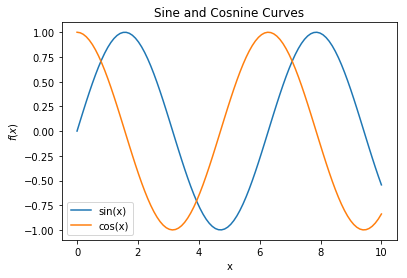

In [35]:
import matplotlib.pyplot as plt

import numpy as np

x = np.linspace(0, 10, 100)

plt.figure() # Storing the plot in an object called 'fig'

plt.plot(x, np.sin(x),
        label = 'sin(x)') # The label is for legend, it is optinal 

plt.plot(x, np.cos(x),
        label = 'cos(x)') # The label is for legend, it is optinal 

plt.title('Sine and Cosnine Curves')

plt.xlabel('x')

plt.ylabel('$ f(x) $')  # use lateX style formating for f(x)

plt.legend()

plt.savefig('Desktop\Sine and Cosine Curves.png') # Exporting the plot 

plt.show()

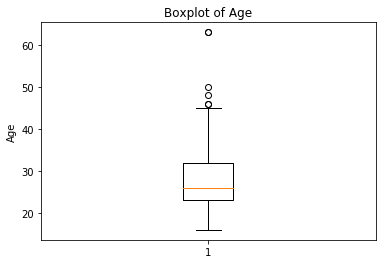

In [43]:
# Histogram
import matplotlib.pyplot as plt

plt.boxplot(Data['A1Age'])
    
plt.title('Boxplot of Age')

plt.ylabel('Age')

plt.savefig('Desktop\Boxplot.png')

plt.show()

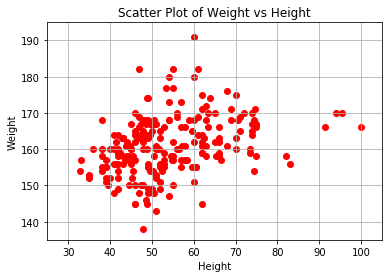

In [37]:
# Scatter plot
import matplotlib.pyplot as plt

fig = plt.figure() # This is optional

plt.scatter(Data['Weight'], Data['Height'],
            color = "red")

plt.xlim(25, 105) # This is optional

plt.ylim(135, 195) # This is optional

plt.xlabel('Height') # This is optional

plt.ylabel('Weight') # This is optional

plt.title('Scatter Plot of Weight vs Height')

plt.grid(True) # This is optional, will show gridlines

fig.savefig('Desktop\Scatter Plot of Weight vs Height_1.png') # This is optional

plt.show()

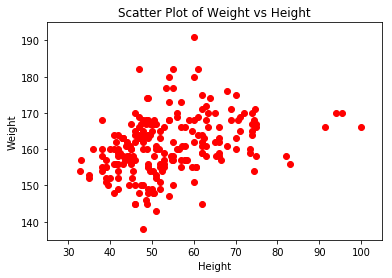

In [38]:
# Scatter plot
import matplotlib.pyplot as plt

fig = plt.figure() # This is optional

plt.scatter(Data['Weight'], Data['Height'],
            color = "red")

plt.xlim(25, 105) # This is optional

plt.ylim(135, 195) # This is optional

plt.xlabel('Height') # This is optional

plt.ylabel('Weight') # This is optional

plt.title('Scatter Plot of Weight vs Height')

plt.grid(False) # This is optional, will show gridlines

fig.savefig('Desktop\Scatter Plot of Weight vs Height_2.png') # This is optional

plt.show()

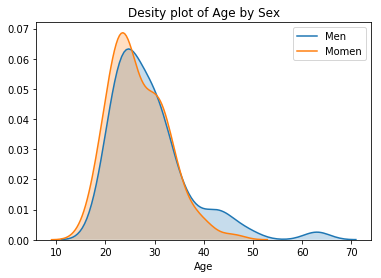

In [39]:
# Density plot
import seaborn as sns

plt.figure()

sns.kdeplot(Data.A1Age[Data.Sex=='Male'], label='Men', shade=True)

sns.kdeplot(Data.A1Age[Data.Sex=='Female'], label='Momen', shade=True)

plt.title('Desity plot of Age by Sex')

plt.xlabel('Age')

plt.savefig('Desktop\Density Plot of Age by Gender.png')

plt.show()

In [29]:
# Bar plot
import matplotlib.pyplot as plt

plt.figure() # This is optional

plt.show()

plt.savefig('Desktop\Scatter Plot of Weight vs Height_2.png') # This is optional

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

1) Regression Analyses

In [30]:
import statsmodels.api as sm 
import pandas as pd

OLS = sm.OLS(data.endog, sm.add_constant(data.exog))




NameError: name 'data' is not defined

2) Regression Analyses

In [ ]:
import statsmodels.api as sm

data = sm.datasets.statecrime.load_pandas()

print(data.endog_name)

print(data.exog_name)


In [31]:
mod = sm.OLS(data.endog, sm.add_constant(data.exog))
res = mod.fit()
print(res.summary())

NameError: name 'data' is not defined